## EDA Historic Demand data (2001-2025)

In this section we will use the (partly cleaned) Historic Demand data and perform an exploratory data analysis (EDA) to better understand the data, find outliers and NaN values and think about how we will deal with this.

### Load data

In [35]:
import pandas as pd
demand_df = pd.read_csv("..\Data\demand_prices\cleaned_data_neso_demand_2001_2025.csv", compression='gzip')
display(demand_df)
demand_df.info()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow,greenlink_flow
0,2001-01-01,1,38631,NaN,34060,NaN,NaN,NaN,NaN,0,...,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-01,2,39808,NaN,35370,NaN,NaN,NaN,NaN,0,...,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-01,3,40039,NaN,35680,NaN,NaN,NaN,NaN,0,...,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-01,4,39339,NaN,35029,NaN,NaN,NaN,NaN,0,...,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01,5,38295,NaN,34047,NaN,NaN,NaN,NaN,0,...,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434009,2025-10-03,44,25095,26540.0,23271,5343.0,6606.0,0.0,20993.0,0,...,507,580.0,409.0,231.0,0.0,-626.0,476.0,607.0,1424.0,499.0
434010,2025-10-03,45,23308,24743.0,21619,5268.0,6606.0,0.0,20993.0,0,...,-3,-245.0,443.0,135.0,0.0,-254.0,105.0,266.0,1399.0,496.0
434011,2025-10-03,46,22176,23499.0,20725,5192.0,6606.0,0.0,20993.0,0,...,-50,-321.0,435.0,99.0,0.0,-226.0,39.0,230.0,1386.0,504.0
434012,2025-10-03,47,20740,22457.0,19448,5271.0,6606.0,0.0,20993.0,0,...,-234,-220.0,-325.0,38.0,-11.0,179.0,-144.0,-196.0,743.0,505.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434014 entries, 0 to 434013
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   settlement_date            434014 non-null  object 
 1   settlement_period          434014 non-null  int64  
 2   nd                         434014 non-null  int64  
 3   tsd                        363886 non-null  float64
 4   england_wales_demand       434014 non-null  int64  
 5   embedded_wind_generation   328846 non-null  float64
 6   embedded_wind_capacity     328846 non-null  float64
 7   embedded_solar_generation  293758 non-null  float64
 8   embedded_solar_capacity    293758 non-null  float64
 9   non_bm_stor                434014 non-null  int64  
 10  pump_storage_pumping       434014 non-null  int64  
 11  scottish_transfer          48334 non-null   float64
 12  ifa_flow                   434014 non-null  int64  
 13  ifa2_flow                  29

### Examine data

#### Quantify missing values

We’ll start by counting how many NaNs each column has, and what percentage of the total that represents.

In [36]:
# Count total and percentage of NaNs per column
na_summary = (
    demand_df.isna()
    .sum()
    .to_frame('missing_count')
    .assign(missing_pct=lambda x: (x['missing_count'] / len(demand_df)) * 100)
    .sort_values('missing_pct', ascending=False)
)

print(na_summary)

                           missing_count  missing_pct
scottish_transfer                 385680    88.863493
eleclink_flow                     315552    72.705489
greenlink_flow                    315552    72.705489
viking_flow                       315552    72.705489
nsl_flow                          315552    72.705489
embedded_solar_generation         140256    32.316008
east_west_flow                    140256    32.316008
nemo_flow                         140256    32.316008
britned_flow                      140256    32.316008
embedded_solar_capacity           140256    32.316008
ifa2_flow                         140256    32.316008
embedded_wind_generation          105168    24.231476
embedded_wind_capacity            105168    24.231476
tsd                                70128    16.158004
moyle_flow                         70128    16.158004
nd                                     0     0.000000
settlement_date                        0     0.000000
settlement_period           

In [37]:
#!pip install matplotlib seaborn

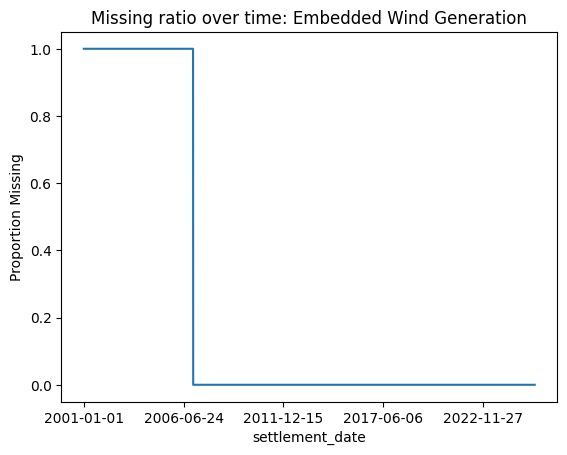

In [38]:
import matplotlib.pyplot as plt

demand_df.groupby('settlement_date')['embedded_wind_generation']\
    .apply(lambda x: x.isna().mean())\
    .plot(title='Missing ratio over time: Embedded Wind Generation')
plt.ylabel('Proportion Missing')
plt.show()


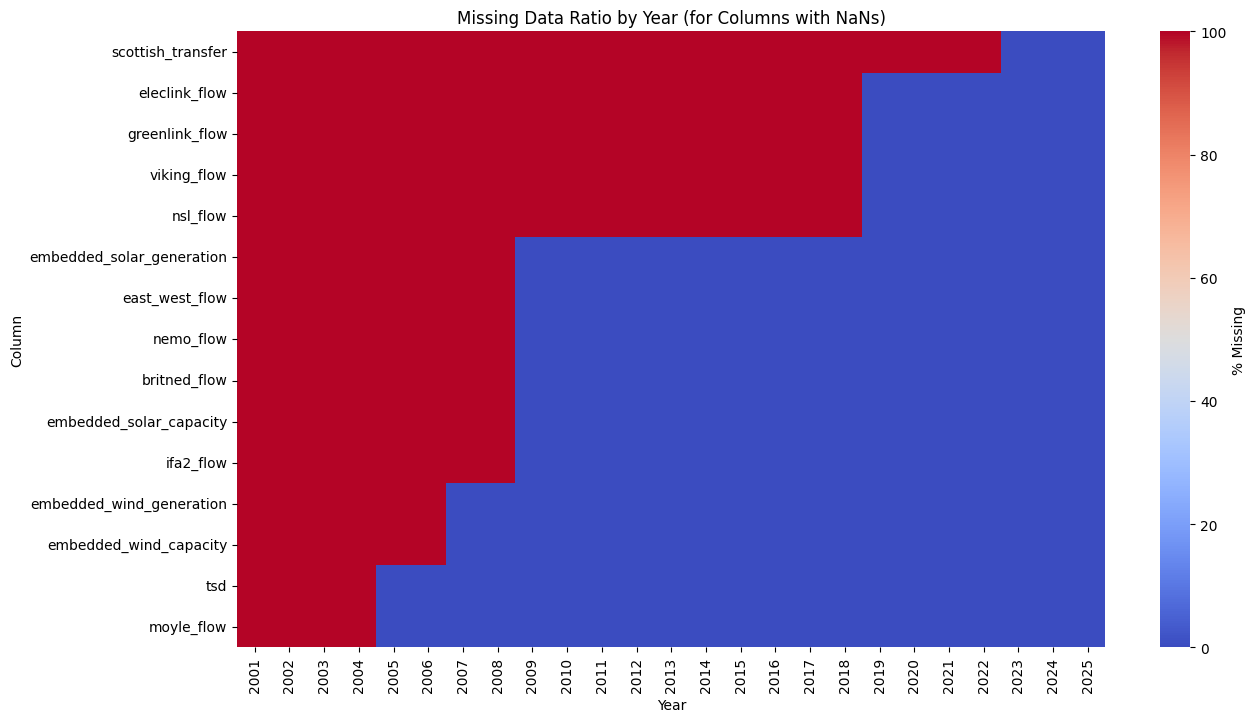

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure settlement_date is a datetime
demand_df['settlement_date'] = pd.to_datetime(demand_df['settlement_date'])

# Extract the year for grouping
demand_df['year'] = demand_df['settlement_date'].dt.year

# Select only columns with missing values
cols_with_na = na_summary[na_summary['missing_count'] > 0].index

# Compute % missing per year per column
missing_by_year = (
    demand_df.groupby('year')[cols_with_na]
    .apply(lambda x: x.isna().mean() * 100)
)

plt.figure(figsize=(14, 8))
sns.heatmap(missing_by_year.T, cmap='coolwarm', cbar_kws={'label': '% Missing'})
plt.title('Missing Data Ratio by Year (for Columns with NaNs)')
plt.xlabel('Year')
plt.ylabel('Column')
plt.show()


Above we can clearly see for each column when measurements have started. This can be something we need to take into account when building our model.

### Detecting and handling outliers

First we need to identify the numeric columns of our data:

In [40]:
numeric_cols = demand_df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['settlement_period', 'nd', 'tsd', 'england_wales_demand',
       'embedded_wind_generation', 'embedded_wind_capacity',
       'embedded_solar_generation', 'embedded_solar_capacity', 'non_bm_stor',
       'pump_storage_pumping', 'scottish_transfer', 'ifa_flow', 'ifa2_flow',
       'britned_flow', 'moyle_flow', 'east_west_flow', 'nemo_flow', 'nsl_flow',
       'eleclink_flow', 'viking_flow', 'greenlink_flow'],
      dtype='object')

#### Detecting outliers using multiple techniques

1. Using z-score method (standard deviation approach):

In [41]:
import numpy as np

# Calculate z-scores
z_scores = np.abs((demand_df[numeric_cols] - demand_df[numeric_cols].mean()) / demand_df[numeric_cols].std())

# Flag outliers (z > 3 is common)
outliers_zscore = (z_scores > 3).sum().sort_values(ascending=False)
print(outliers_zscore)

non_bm_stor                  8150
greenlink_flow               8085
embedded_solar_generation    7823
embedded_wind_generation     4973
tsd                          4811
viking_flow                  3711
pump_storage_pumping          662
england_wales_demand           37
nd                             28
britned_flow                    1
settlement_period               0
embedded_solar_capacity         0
embedded_wind_capacity          0
ifa2_flow                       0
ifa_flow                        0
scottish_transfer               0
moyle_flow                      0
nemo_flow                       0
east_west_flow                  0
eleclink_flow                   0
nsl_flow                        0
dtype: int64


2. IQR (Inter quartile range) method:

In [42]:
Q1 = demand_df[numeric_cols].quantile(0.25)
Q3 = demand_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((demand_df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                (demand_df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_iqr.sort_values(ascending=False)

ifa2_flow                    85417
pump_storage_pumping         51276
embedded_solar_generation    44954
viking_flow                  28707
east_west_flow               24677
non_bm_stor                  19353
embedded_wind_generation     15513
greenlink_flow               12268
nemo_flow                    10053
eleclink_flow                 7237
tsd                           5018
moyle_flow                      18
england_wales_demand            15
nd                               7
ifa_flow                         2
settlement_period                0
embedded_wind_capacity           0
scottish_transfer                0
embedded_solar_capacity          0
britned_flow                     0
nsl_flow                         0
dtype: int64

3. Using visualizations:

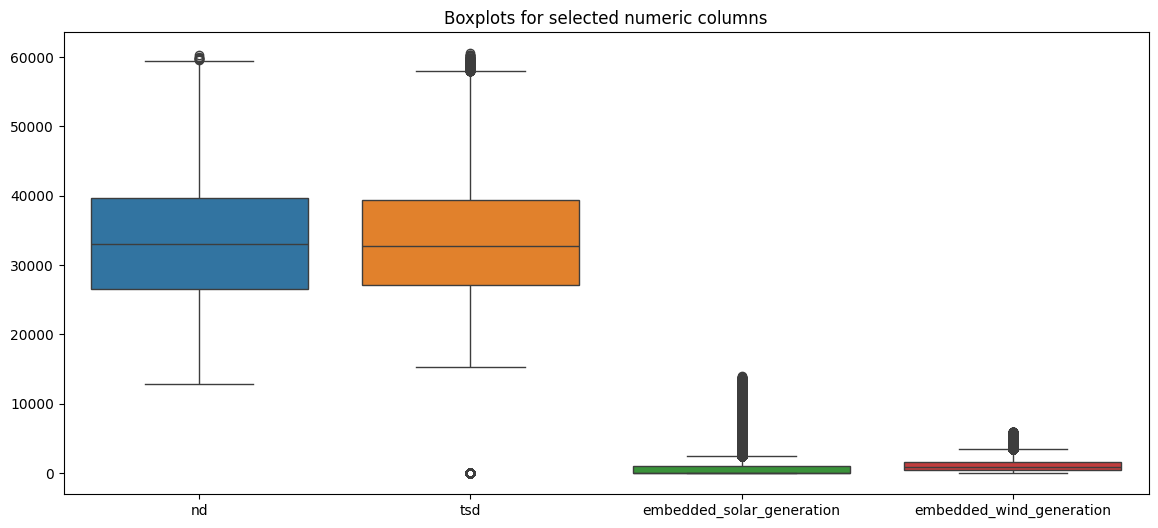

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=demand_df[['nd', 'tsd', 'embedded_solar_generation', 'embedded_wind_generation']])
plt.title('Boxplots for selected numeric columns')
plt.show()


### Identify categorical and ordered columns

Let's first examine the datatypes in the dataset:

In [44]:
demand_df.dtypes

settlement_date              datetime64[ns]
settlement_period                     int64
nd                                    int64
tsd                                 float64
england_wales_demand                  int64
embedded_wind_generation            float64
embedded_wind_capacity              float64
embedded_solar_generation           float64
embedded_solar_capacity             float64
non_bm_stor                           int64
pump_storage_pumping                  int64
scottish_transfer                   float64
ifa_flow                              int64
ifa2_flow                           float64
britned_flow                        float64
moyle_flow                          float64
east_west_flow                      float64
nemo_flow                           float64
nsl_flow                            float64
eleclink_flow                       float64
viking_flow                         float64
greenlink_flow                      float64
year                            

Notice how almost all the datatypes are either int64 or float64 (numerical). However the settlement_period is a categorical variable since it contains the (ordered) half hour periods of each day. We will convert this to a categorical value next:

In [45]:
demand_df['settlement_period'] = pd.Categorical(
    demand_df['settlement_period'],
    categories=range(1, 49),
    ordered=True
)

C:\Users\sande\AppData\Local\Temp\ipykernel_32164\619795036.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_demand = demand_df.groupby('settlement_period')['nd'].mean().reset_index()


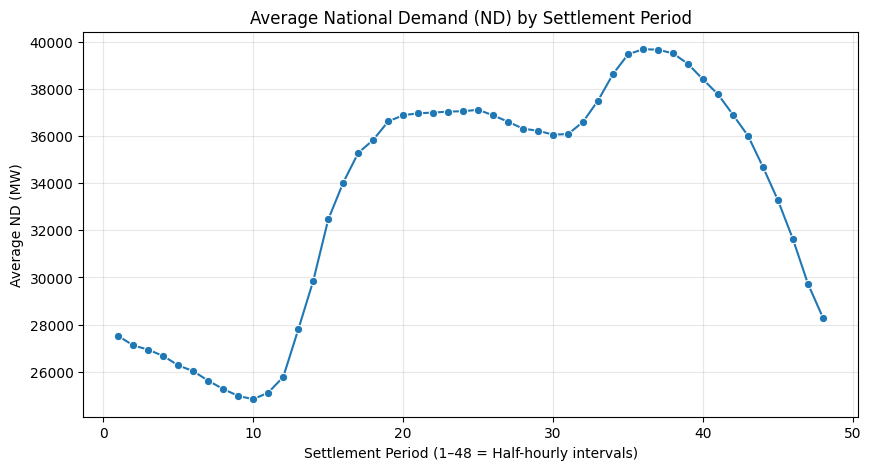

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average ND per settlement period
avg_demand = demand_df.groupby('settlement_period')['nd'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_demand, x='settlement_period', y='nd', marker='o')
plt.title('Average National Demand (ND) by Settlement Period')
plt.xlabel('Settlement Period (1–48 = Half-hourly intervals)')
plt.ylabel('Average ND (MW)')
plt.grid(True, alpha=0.3)
plt.show()
